## Hacker News Posts project
- the dataset emcompasses post from Reddit, a website where users submit and comment posts
- the project focus on taking a closer look at
    - the post where the user ask a question to the website Hacker News: **Ask HN**. 
    - the the posts where the user show a project to the website Hacker News: **Show HN**

**The questions:**
- *out of the 2, what type gets more comments on average?* 
- *does the time of the post influences the number of comments in average?*



#### The analyse was done first with only **Python** and then using Pandas

### 1. import database
The database is imported as a list

In [1]:
from csv import reader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file=open('HN_posts_year_to_Sep_26_2016.csv', encoding='utf-8')
read_file=reader(file)
hn=list(read_file)

In [3]:
#headers
hn[0]

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [4]:
headers=hn[0] #extract headers
hn=hn[1:] #remove headers from dataset

In [5]:
#observe the first data entry 
print(hn[0])

['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']


In [6]:
len(hn)

293119

### 2. splitting of  the post starting  with either **Ask HN** or **Show HN**  

In [7]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title=row[1]
    title=title.lower()
    if title.startswith('ask'):
        ask_posts.append(row)
    elif title.startswith('show'):
        show_posts.append(row)
    else:
        other_posts.append(row)
print(f"there are {len(hn)} posts in total")
print(f"there are {len(ask_posts)} ask posts")
print(f"there are {len(show_posts)} show posts")
print(f"other posts {len(other_posts)}")
print(len(ask_posts+show_posts+other_posts))

there are 293119 posts in total
there are 9269 ask posts
there are 10218 show posts
other posts 273632
293119


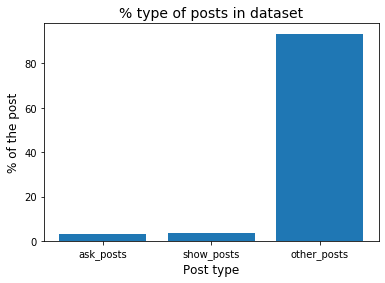

In [134]:
#show with a graph
bar_chart=[]
for element in [ask_posts, show_posts,other_posts]:
    bar_chart.append(len(element)/len(hn)*100)
    
label=['ask_posts', 'show_posts','other_posts']
#plot number of post 
plt.figure()
plt.bar(label,bar_chart)
plt.title('% type of posts in dataset',size=14)
plt.xlabel('Post type',size=12)
plt.ylabel('% of the post',size=12) 

plt.savefig('0_kind_of_posts.jpg')


#### remarks:
We have well split the show/ask posts the rest of the dataset but they represent only a fraction of it.

###  1. Average comments  per Show or Ask posts

what type of post get the max average number of posts?

In [9]:
#loop into each respective dataset and summing of each comments
def average_comments(my_list):
    '''
    Return the average numbers of comments
    '''
    total_comments=0
    
    for row in my_list:
        num_comments=row[4]
        num_comments=int(num_comments)
        total_comments += num_comments
    
    avg_comments=total_comments/len(my_list)
    
    return avg_comments

In [10]:
#average numbers post for ask posts
avg_ask_comments = average_comments(ask_posts)
print(avg_ask_comments)

10.328622289351602


In [11]:
#average numbers pot for show posts
avg_show_comments = average_comments(show_posts)
print(avg_show_comments)

4.8623996868271675


=> **Ask HN** posts have 5 comments more than **Show HN* posts**  (10.3 vs 4.86)

### 2. Time of publication vs number of comments
#### 2.1 time vs #comments or #posts: Ask HN posts

=> Fixing  format of the date entry

The date fortmat is month/day/year and time is 24 hours:

In [12]:
print(headers)
#the time is the last element of the lists
ask_posts[-1][-1]

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


'9/6/2015 6:02'

In [13]:
import datetime as dt

# list containing [time of publication , n_comments]  for each posts in ask questions
result_lists=[] 

for row in ask_posts:
    time=row[6]
    n_comments=int(row[4])
    post=[time, n_comments]
    result_lists.append(post)

In [14]:
#type date format
print(result_lists[0])
print(type(result_lists[0][0]))

['9/26/2016 2:53', 7]
<class 'str'>


=> at the moment, the date is still consider as a string, the datetime.strptime() methods will be employed to format the time and isolates the hour info

In [135]:
posts_by_hours={} #number of posts per hour
comments_by_hours={} #number of comments per hour

for row in result_lists:
    time_str=row[0] #isolation of the time info
    time_dt=dt.datetime.strptime(time_str,'%m/%d/%Y %H:%M') #formating
    hour=time_dt.strftime("%H") #isloation time info

    #number of comments
    n_comments=row[1]

    #number of post per hour
    if hour in posts_by_hours:
        posts_by_hours[hour] +=1
    else:
        posts_by_hours[hour]=1

    #number of comments per hour
    if hour in comments_by_hours:
        comments_by_hours[hour] += n_comments
    else:
        comments_by_hours[hour] = n_comments 

In [16]:
#sorting n_comment by chronological hour
sorted_posts_by_hours={}
for key in sorted(posts_by_hours.keys()):
    sorted_posts_by_hours[key]=posts_by_hours[key]

print(sorted_posts_by_hours)

{'00': 303, '01': 286, '02': 271, '03': 275, '04': 247, '05': 210, '06': 238, '07': 228, '08': 260, '09': 224, '10': 287, '11': 317, '12': 351, '13': 449, '14': 524, '15': 651, '16': 587, '17': 598, '18': 630, '19': 563, '20': 516, '21': 522, '22': 384, '23': 348}


Text(0.5, 0, 'hours')

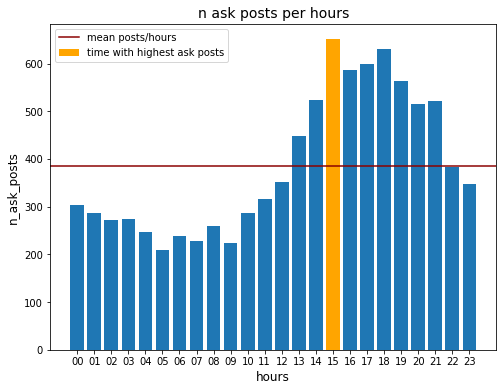

In [17]:
#stats
mean_posts_by_hours=np.mean(list(sorted_posts_by_hours.values()))
std_post_by_hours=np.std(list(sorted_posts_by_hours.values()))

#plot n_comments vs hour
fig1=plt.figure(figsize=(8,6))
plt.bar(sorted_posts_by_hours.keys(),sorted_posts_by_hours.values())
plt.bar('15',sorted_posts_by_hours['15'],color='orange',label='time with highest ask posts')
plt.axhline(mean_posts_by_hours,
            color='darkred',
            label='mean posts/hours')

plt.legend()
plt.title('n ask posts per hours',size=14)
plt.ylabel('n_ask_posts',size=12)
plt.xlabel('hours',size=12)

plt

=>posts are mostly published during the afternoon until evening with a pick between 3pm - 4pm

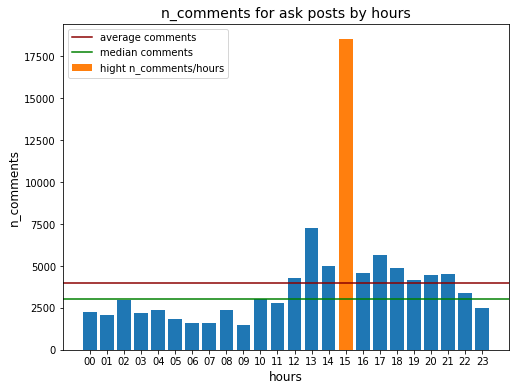

In [18]:
sorted_comments_by_hours={}
for key in sorted(comments_by_hours.keys()):
    sorted_comments_by_hours[key]=comments_by_hours[key]

fig2=plt.figure(figsize=(8,6))

mean_comments_by_hours=np.mean(list(sorted_comments_by_hours.values()))
median_comments_by_hours=np.median(list(sorted_comments_by_hours.values()))

plt.bar(sorted_comments_by_hours.keys(),
        sorted_comments_by_hours.values())

plt.bar(15,sorted_comments_by_hours['15'],
        label='hight n_comments/hours')

plt.axhline(mean_comments_by_hours,color='darkred',label='average comments')
plt.axhline(median_comments_by_hours,color='green',label='median comments')

plt.xlabel('hours',size=12)
plt.ylabel('n_comments',size=12)
plt.title('n_comments for ask posts by hours',size=14)
plt.legend()

=> posts published between **3 and 4pm** are the one with the highest number of comments. 
the small increase of number of post (see cell above) at 15 does not explain the steep increase of comments for 15.
       
=> the hours labeleled are from EST, in Europe is 6 hours more hence the location from the posts or comments was written could be a complentary information

the calculation of the **average number of comments per post according to the hours** might help to get a better overview of the trend

**Average # comments per posts/ hours for Ask HN posts**

In [19]:
# n_comments_by_hours/n_posts_by_hours
avg_by_hour={}
for hour in sorted_comments_by_hours:
    
    average = sorted_comments_by_hours[hour] / sorted_posts_by_hours[hour]
    avg_by_hour[hour]=average
print(avg_by_hour)

{'00': 7.514851485148514, '01': 7.311188811188811, '02': 11.062730627306273, '03': 7.970909090909091, '04': 9.611336032388664, '05': 8.752380952380953, '06': 6.676470588235294, '07': 6.956140350877193, '08': 9.146153846153846, '09': 6.59375, '10': 10.515679442508711, '11': 8.83596214511041, '12': 12.190883190883191, '13': 16.169265033407573, '14': 9.517175572519085, '15': 28.456221198156683, '16': 7.846678023850085, '17': 9.41304347826087, '18': 7.750793650793651, '19': 7.351687388987567, '20': 8.662790697674419, '21': 8.620689655172415, '22': 8.78125, '23': 7.089080459770115}


Text(0, 0.5, 'mean comments/ask HN post')

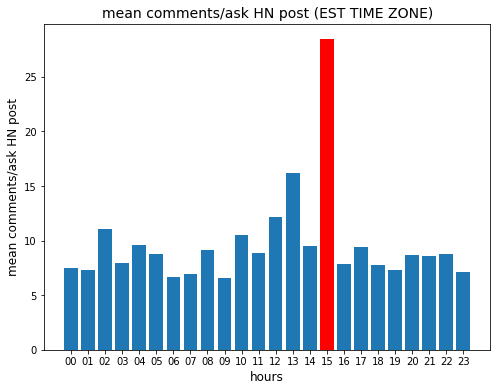

In [20]:
fig3=plt.figure(figsize=(8,6))
plt.bar(avg_by_hour.keys(),avg_by_hour.values())
plt.bar(15,avg_by_hour['15'],
        color='red',
        label='hightest comments/ ask HN post')
plt.title('mean comments/ask HN post (EST TIME ZONE)',size=14)
plt.xlabel('hours',size=12)
plt.ylabel('mean comments/ask HN post',size=12)

In [21]:
#transforming to european time
europe_hours=[]
hours=list(avg_by_hour)
for hour in hours:
    hour=dt.datetime.strptime(hour,'%H')
    hours_added = dt.timedelta(hours = 6)
    
    europe_time = hour + hours_added
    europe_hours.append(europe_time.strftime('%H')) #can also be done with europe_time.hour

Text(0, 0.5, 'mean comments/ask HN post')

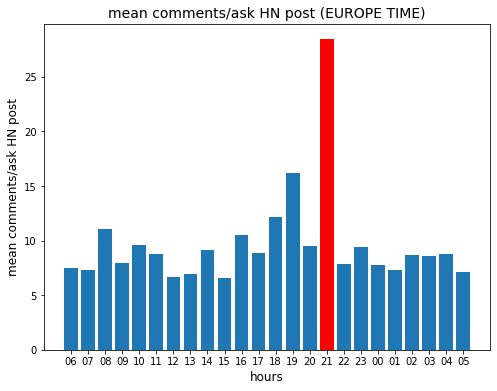

In [22]:
#repolot with for europe time (+6 hours)

fig4=plt.figure(figsize=(8,6))
plt.bar(europe_hours,avg_by_hour.values())
plt.bar(15,avg_by_hour['15'],color='red', label='hightest comments/ ask HN post')
plt.title('mean comments/ask HN post (EUROPE TIME)',size=14)
plt.xlabel('hours',size=12)
plt.ylabel('mean comments/ask HN post',size=12)

=> to get the most number of comments on your post, better to post between 21:00 - 22:00 then 19:00 - 20:00

#### 2.2 same work with show HN posts

**fixing type**

In [23]:
headers

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [24]:
for row in show_posts[0]:
    print(type(row))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [25]:
#fixing type

for row in show_posts:
    #id
    row[0]=int(row[0])
    #points
    row[3]=int(row[3])
    #comments
    row[4]=int(row[4])
    #time
    row[-1]=dt.datetime.strptime(row[-1],'%m/%d/%Y %H:%M')

**Show HN post per hours**

In [26]:
#number of show HN posts by hours 

show_post_fr={}
for row in show_posts:
    hour=row[-1].strftime('%H')
    if hour in show_post_fr:
        show_post_fr[hour] += 1
    else:
        show_post_fr[hour] = 1
        
#sorted dictionnary by chronological order
sorted_show_post_fr={}
for key in sorted(show_post_fr.keys()):
    sorted_show_post_fr[key] = show_post_fr[key]

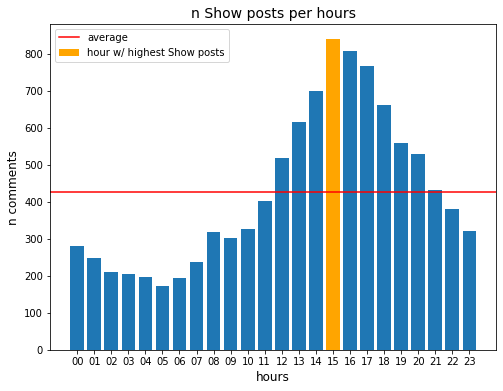

In [27]:
#plot 
fig5=plt.figure(figsize=(8,6))

plt.bar(sorted_show_post_fr.keys(),sorted_show_post_fr.values())
plt.bar(15, sorted_show_post_fr['15'],
       color='orange',
       label='hour w/ highest Show posts')

plt.axhline(np.mean(list(sorted_show_post_fr.values())),
           color='red',
           label='average')
plt.xlabel('hours',size=12)
plt.ylabel('n comments',size=12)
plt.title('n Show posts per hours',size=14)

plt.legend()

**comments per hours for Show HN posts**

In [28]:
#computing of comments per hours 
show_posts_n_comments={}
for row in show_posts:
    #isolate hour info
    hour=row[-1].strftime('%H')
    n_comments=row[4]
    if hour in show_posts_n_comments:
        show_posts_n_comments[hour] = show_posts_n_comments[hour]+n_comments
    else:
        show_posts_n_comments[hour] = n_comments

sorted_show_post_n_comments={}
for key in sorted(show_posts_n_comments.keys()):
    sorted_show_post_n_comments[key] = show_posts_n_comments[key]

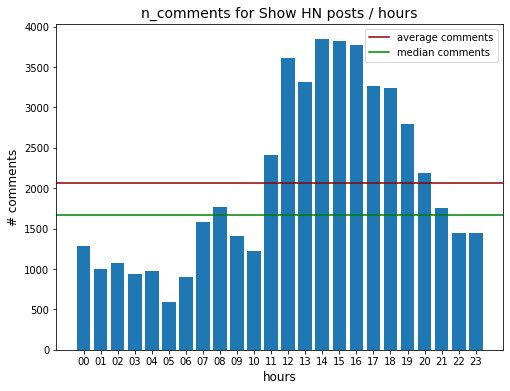

In [29]:
#plotting
fig6=plt.figure(figsize=(8,6))

plt.bar(sorted_show_post_n_comments.keys(),sorted_show_post_n_comments.values())
plt.axhline(np.mean(list(sorted_show_post_n_comments.values())),color='darkred',label='average comments')
plt.axhline(np.median(list(sorted_show_post_n_comments.values())),color='green',label='median comments')

plt.title('n_comments for Show HN posts / hours',size=14)
plt.xlabel('hours', size=12)
plt.ylabel('# comments',size=12)
plt.legend()


 **comments/ Shown HN posts / hours**

In [30]:
average_comments_shown_post={}
for hour in hours:
    temp=sorted_show_post_n_comments[hour] / sorted_show_post_fr[hour]
    average_comments_shown_post[hour] = temp

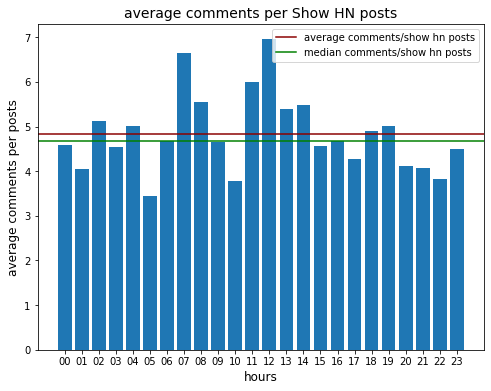

In [31]:
#plot

fig7=plt.figure(figsize=(8,6))
plt.bar(average_comments_shown_post.keys(),average_comments_shown_post.values())

plt.axhline(np.mean(list(average_comments_shown_post.values())),color='darkred',label='average comments/show hn posts')
plt.axhline(np.median(list(average_comments_shown_post.values())),color='green',label='median comments/show hn posts')

plt.title('average comments per Show HN posts',size=14)
plt.xlabel('hours', size=12)
plt.ylabel('average comments per posts',size=12)
plt.legend()

## going further: 
Determine if show or ask posts receive more points on average.
Determine if posts created at a certain time are more likely to receive more points.
Compare your results to the average number of comments and points other posts receive.

Done with Pandas

### 3.points in average for Show HN and Ask HN post

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')

In [34]:
df.columns

Index(['id', 'title', 'url', 'num_points', 'num_comments', 'author',
       'created_at'],
      dtype='object')

In [35]:
df['title']=df['title'].str.lower()

In [36]:
#fix datetime 
df['created_at']=pd.to_datetime(df['created_at'],format='%m/%d/%Y %H:%M')

In [37]:
#select all post starting with show 
df_show=df.loc[df['title'].str.startswith('show')].copy()

In [38]:
df_show.dtypes

id                       int64
title                   object
url                     object
num_points               int64
num_comments             int64
author                  object
created_at      datetime64[ns]
dtype: object

In [39]:
#select all posts starting with "ask"
df_ask=df.loc[df['title'].str.startswith('ask')].copy()

In [40]:
#compute mean point for show HN posts
df_show['num_points'].mean()

14.787238207085535

In [41]:
#compute mean points for ask HN posts
df_ask['num_points'].mean()

11.257309310605244

**average points per hours**

In [68]:
def points_per_hours(df):
    #build a frequency table
    posts_points_by_hour={}
    for index, row in df.iterrows():
        hour = row['created_at'].strftime('%H')
        points=row['num_points']

        if hour in posts_points_by_hour:
            posts_points_by_hour[hour]=posts_points_by_hour[hour] + points
        else:
            posts_points_by_hour[hour]=points
    #chronological frequency table
    sorted_posts_points_by_hour={}
    for hour in hours:
        sorted_posts_points_by_hour[hour]=posts_points_by_hour[hour]

    return sorted_posts_points_by_hour

In [70]:
show_posts_points_per_hours=points_per_hours(df_show)
ask_posts_points_per_hours=points_per_hours(df_ask)

<BarContainer object of 24 artists>

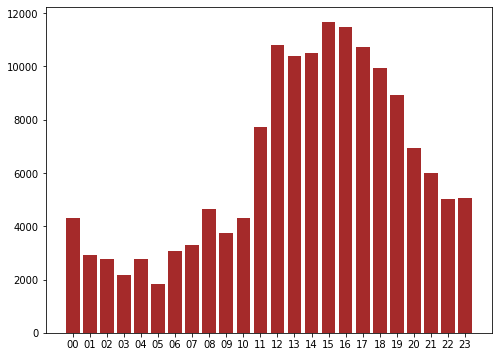

In [130]:
plt.figure(figsize=(8,6))
plt.bar(show_posts_points_per_hours.keys(), 
        show_posts_points_per_hours.values(),
        color='brown',
        #legend='show HN posts'
       )

<BarContainer object of 24 artists>

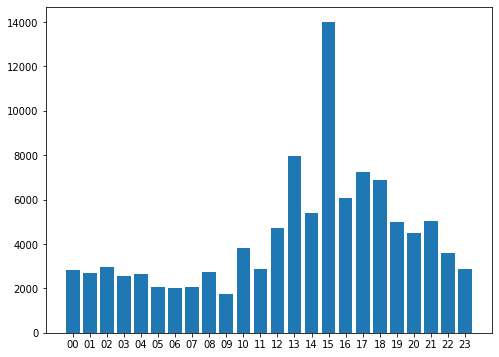

In [85]:
plt.figure(figsize=(8,6))
plt.bar(ask_posts_points_per_hours.keys(),
        ask_posts_points_per_hours.values())

In [137]:
df.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at,hour
count,2.931190e+05,293119,279256,293119.000000,293119.000000,293119,293119,293119
unique,NaN,267597,247602,NaN,NaN,51900,215563,24
top,NaN,employee benefits at basecamp,http://www.aioptify.com/topmldmbooks.php?utm_s...,NaN,NaN,jonbaer,2016-04-09 22:40:00,16
freq,NaN,16,22,NaN,NaN,2731,11,20170
first,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-06 05:50:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-26 03:26:00,NaN
mean,1.133046e+07,NaN,NaN,15.025324,6.525544,NaN,NaN,NaN
std,6.961055e+05,NaN,NaN,58.504103,30.376319,NaN,NaN,NaN
min,1.017690e+07,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,1.071636e+07,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
